<a href="https://colab.research.google.com/github/aiyingliulang/Play-with-Machine-Learning-Algorithms/blob/master/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
import matplotlib.ticker as ticker

In [4]:
path = "test.xlsx"
df = pd.read_excel(path, 
                #  na_values=[' ',0],
                 usecols=['oil/day'])
df.head(70)

,oil/day
0,318.03
1,376.77
2,337.63
3,241.74
4,224.87
...,...
65,17.21
66,13.77
67,2.00
68,22.75


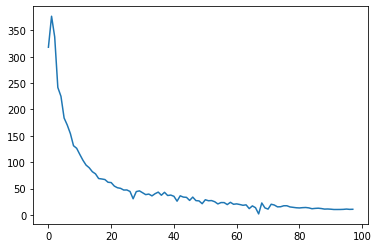

In [5]:
dataset=df.values
plt.plot(dataset)

Epoch 1/100
64/64 - 2s - loss: 0.0170 - 2s/epoch - 36ms/step
Epoch 2/100
64/64 - 0s - loss: 0.0088 - 200ms/epoch - 3ms/step
Epoch 3/100
64/64 - 0s - loss: 0.0067 - 163ms/epoch - 3ms/step
Epoch 4/100
64/64 - 0s - loss: 0.0052 - 95ms/epoch - 1ms/step
Epoch 5/100
64/64 - 0s - loss: 0.0040 - 111ms/epoch - 2ms/step
Epoch 6/100
64/64 - 0s - loss: 0.0029 - 100ms/epoch - 2ms/step
Epoch 7/100
64/64 - 0s - loss: 0.0021 - 102ms/epoch - 2ms/step
Epoch 8/100
64/64 - 0s - loss: 0.0014 - 95ms/epoch - 1ms/step
Epoch 9/100
64/64 - 0s - loss: 8.5919e-04 - 98ms/epoch - 2ms/step
Epoch 10/100
64/64 - 0s - loss: 5.6832e-04 - 97ms/epoch - 2ms/step
Epoch 11/100
64/64 - 0s - loss: 3.8363e-04 - 107ms/epoch - 2ms/step
Epoch 12/100
64/64 - 0s - loss: 2.9080e-04 - 97ms/epoch - 2ms/step
Epoch 13/100
64/64 - 0s - loss: 2.5248e-04 - 95ms/epoch - 1ms/step
Epoch 14/100
64/64 - 0s - loss: 2.3221e-04 - 99ms/epoch - 2ms/step
Epoch 15/100
64/64 - 0s - loss: 2.2869e-04 - 107ms/epoch - 2ms/step
Epoch 16/100
64/64 - 0s - loss

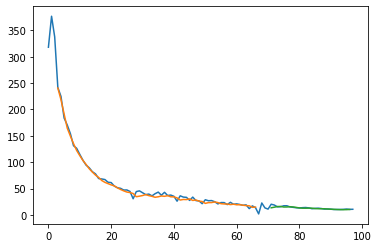

In [6]:
# LSTM

import numpy
import matplotlib.pyplot as plt
from pandas import read_excel
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# 将值数组转换为数据集矩阵
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# 固定随机种子
numpy.random.seed(7)
# 加载数据集
dataframe = read_excel(path, usecols=['oil/day'])
dataset = dataframe.values
dataset = dataset.astype('float32')
# 规范化数据
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 划分数据集
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# 转化为 X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# 将输入变为 [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# 创建并训练 LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# 预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# 反转预测
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# 计算均方根误差
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# 绘图（训练）
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# 绘图（测试）
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<ipython-input-7-fd54322e5645>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


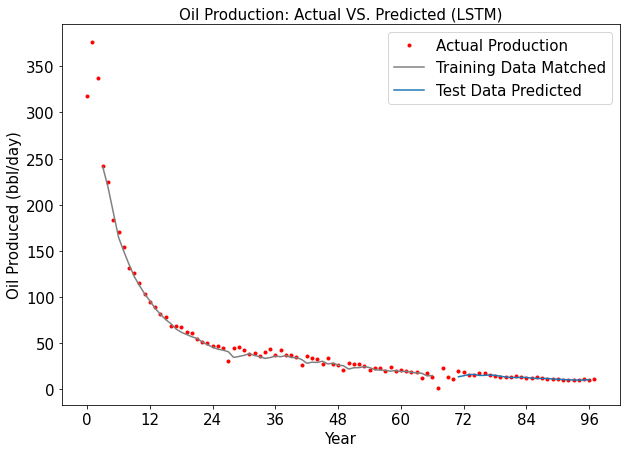

In [7]:
# plot baseline and predictions
plt.figure(figsize=(10,7))

plt.plot(scaler.inverse_transform(dataset),'.',color='red')
plt.plot(trainPredictPlot,"-", color='gray')
plt.plot(testPredictPlot)

plt.title('comparison')
plt.ylabel('Oil Produced (bbl/day)',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.legend(['Actual Production', 'Training Data Matched','Test Data Predicted'], loc='upper right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Oil Production: Actual VS. Predicted (LSTM)',fontsize=15)


ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
# ax.set_ylim(0,1000)
# ax.set_xlim(48,84)